In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
titanic = sns.load_dataset("titanic")
# sb.get_dataset_names()
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [116]:
print(titanic.shape)
titanic.info()

(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

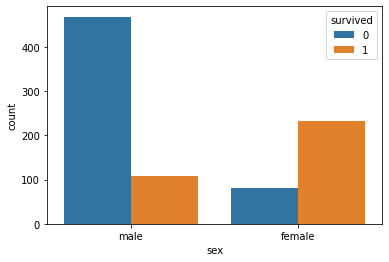

In [8]:
sns.countplot(titanic["sex"],hue=titanic["survived"])

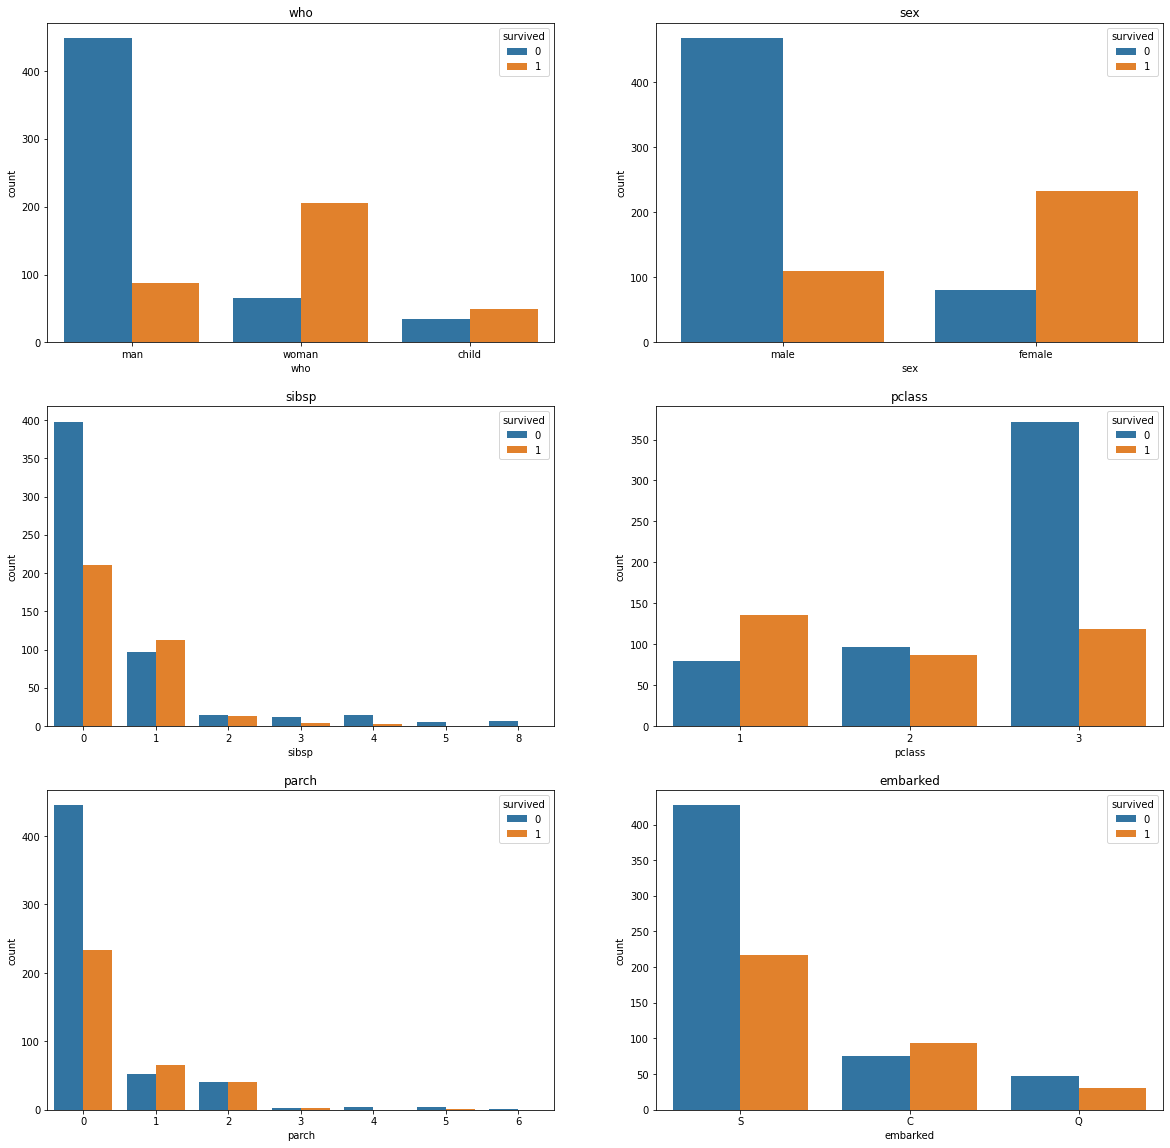

In [9]:
cols = ["who","sex","sibsp","pclass","parch","embarked"]

no_of_rows = 3
no_of_cols = 2

fig, axs = plt.subplots(no_of_rows,no_of_cols,figsize = (20,20))

for r in range(no_of_rows):
  for c in range(no_of_cols):
    i = r*no_of_cols + c
    ax = axs[r][c]
    sns.countplot(titanic[cols[i]],hue = titanic["survived"],ax=ax)
    ax.set_title(cols[i])
    ax.legend(title = "survived",loc = "upper right")

plt.show()

In [10]:
titanic.groupby("sex")[["survived"]].describe()

survived                                             
          count      mean       std  min  25%  50%  75%  max
sex                                                         
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

In [11]:
titanic.pivot_table("survived",index="sex",columns="pclass")

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='pclass', ylabel='survived'>

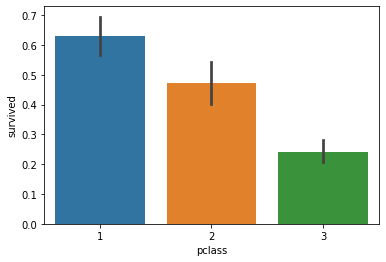

In [12]:
sns.barplot(x="pclass",y = "survived",data=titanic)

In [117]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [118]:
age = pd.cut(titanic['age'], [0, 18, 80],labels=["child","adult"])
titanic.pivot_table('fare', ['sex', age], 'class')

class              First     Second      Third
sex    age                                    
female child  127.474245  25.064286  17.370835
       adult  105.043469  21.224653  14.785453
male   child  114.638320  26.116947  20.639055
       adult   68.877389  20.219593  10.022624

In [42]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [119]:
titanic =  titanic.drop("deck",axis=1)

In [50]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [120]:
titanic.dropna(subset=["age","embark_town"],inplace=True)

In [121]:
titanic.drop(["who","embarked","alive"], axis=1,inplace=True)

In [122]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   class        712 non-null    category
 8   adult_male   712 non-null    bool    
 9   embark_town  712 non-null    object  
 10  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(2)
memory usage: 52.3+ KB


In [128]:
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    424
1    288
Name: survived, dtype: int64

3    355
1    184
2    173
Name: pclass, dtype: int64

male      453
female    259
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: age, Length: 88, dtype: int64

0    469
1    183
2     25
4     18
3     12
5      5
Name: sibsp, dtype: int64

0    519
1    110
2     68
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
82.1708     1
26.3875     1
25.5875     1
39.4000     1
10.5167     1
Name: fare, Length: 219, dtype: int64

Third     355
First     184
Second    173
Name: class, dtype: int64

True     413
False    299
Name: adult_male, dtype: int64

Southampton    554
Cherbourg      130
Queenstown      28
Name: embark_town, dtype: int64

True     402
False    310
Name: alone, dtype: int64



In [139]:
from sklearn.preprocessing import LabelEncoder
labeencoder = LabelEncoder()
titanic["sex"] = labeencoder.fit_transform(titanic["sex"].values)
titanic["class"] = labeencoder.fit_transform(titanic["class"].values)
titanic["adult_male"] = labeencoder.fit_transform(titanic["adult_male"].values)
titanic["embark_town"] = labeencoder.fit_transform(titanic["embark_town"].values)

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=titanic.drop(['survived'],axis=1)
Y=titanic['survived']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.10)

In [141]:
from sklearn.linear_model import accuracy_score,LogisticRegression
lr=LogisticRegression(max_iter=300)
lr.fit(X_train,y_train)
yhat_lr=lr.predict(X_test)
print("Accuracy of Logistic Model is:",accuracy_score(yhat_lr,y_test))

Accuracy of Logistic Model is: 0.8194444444444444


Text(33.0, 0.5, 'Actual')

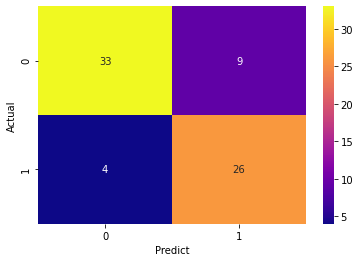

In [142]:
from sklearn.metrics import confusion_matrix
ax=confusion_matrix(yhat_lr,y_test)
sns.heatmap(ax,annot=True,cmap=plt.cm.plasma)
plt.xlabel('Predict')
plt.ylabel('Actual')